<a href="https://colab.research.google.com/github/tabriznaghiyev/ml_projects/blob/main/comparing_xgb_dtr_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# comparing scores of 'Decision Tree Regressor', 'XGBoost Regressor', 'Gradient Boosting Regressor'





In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import math

import warnings
warnings.filterwarnings("ignore")

In [71]:
raw_data=pd.read_csv(r"/content/Car details v3.csv")

In [72]:
test=raw_data.drop_duplicates(subset='name')
test.fuel.value_counts()

Diesel    1129
Petrol     889
CNG         23
LPG         17
Name: fuel, dtype: int64

In [73]:
#raw_data.describe()
#raw_data.info()
#raw_data.head()

In [74]:
def PercentageofMissingData(dataset):
    # Calculating the percentage of missing data in each column
    # The error was in the multiplication - it should be outside the len() function
    return dataset.isna().sum() / len(dataset) * 100

# Printing the count of missing values in each column of raw_data
print(raw_data.isnull().sum())
print()

# Printing the percentage of missing data in each column of raw_data
print(PercentageofMissingData(raw_data))


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64


# OUTLIERS

In [75]:
raw_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [76]:
raw_data.dropna(inplace=True, axis=0, how='any')
raw_data.duplicated().sum()
raw_data.drop_duplicates(inplace=True)

In [78]:
# Ensure 'mileage', 'engine', and 'max_power' are of string type before string operations
raw_data['mileage'] = raw_data['mileage'].astype(str)
raw_data['engine'] = raw_data['engine'].astype(str)
raw_data['max_power'] = raw_data['max_power'].astype(str)

# Removing units and commas from 'mileage'
raw_data['mileage'] = raw_data['mileage'].replace(' kmpl', '', regex=True)
raw_data['mileage'] = raw_data['mileage'].replace(' km/kg', '', regex=True)
raw_data['mileage'] = raw_data['mileage'].str.replace(',', '')

# Removing unit and commas from 'engine'
raw_data['engine'] = raw_data['engine'].replace(' CC', '', regex=True)
raw_data['engine'] = raw_data['engine'].str.replace(',', '')

# Removing unit and commas from 'max_power'
raw_data['max_power'] = raw_data['max_power'].replace(' bhp', '', regex=True)
raw_data['max_power'] = raw_data['max_power'].str.replace(',', '')

# Converting columns to numeric types
raw_data['mileage'] = pd.to_numeric(raw_data['mileage'], errors='coerce')
raw_data['engine'] = pd.to_numeric(raw_data['engine'], errors='coerce')
raw_data['max_power'] = pd.to_numeric(raw_data['max_power'], errors='coerce')

# Displaying the DataFrame information
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 734.7+ KB


Text(0.5, 0, 'Selling_Price')

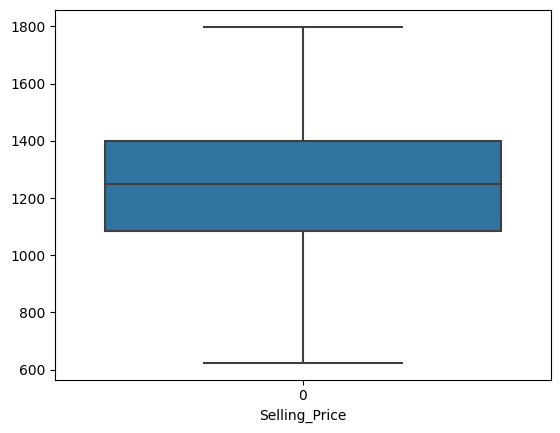

In [91]:
sns.boxplot(raw_data['engine'])
plt.xlabel('Selling_Price')

In [86]:
# Calculating the first and third quartiles (Q1 and Q3) of the 'engine' column
Q1 = raw_data['engine'].quantile(0.25)
Q3 = raw_data['engine'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating the upper and lower limits for outlier detection
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Displaying outliers that are above the upper limit
raw_data[raw_data['engine'] > upper_limit]

# Displaying outliers that are below the lower limit
raw_data[raw_data['engine'] < lower_limit]

# Filtering the DataFrame to exclude outliers in the 'engine' column

#raw_data = raw_data[raw_data['engine'] < upper_limit]
raw_data = raw_data[(raw_data['engine'] < upper_limit) & (raw_data['engine'] > lower_limit)]

# Displaying the shape of the DataFrame after removing outliers
raw_data.shape


(5511, 13)

Text(0.5, 0, 'Selling_Price')

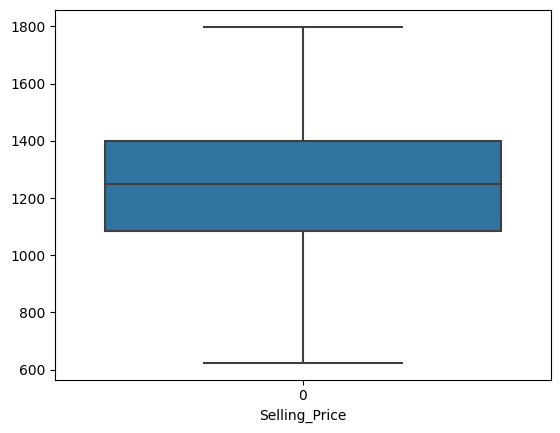

In [92]:
sns.boxplot(raw_data['engine'])
plt.xlabel('Selling_Price')

This script correctly calculates the IQR for the 'engine' column and determines the upper and lower limits for outlier detection. It then displays the rows considered outliers (those outside the upper and lower limits). Finally, it filters the DataFrame to exclude these outliers and displays the new shape of the DataFrame.

Text(0.5, 0, 'Selling_Price')

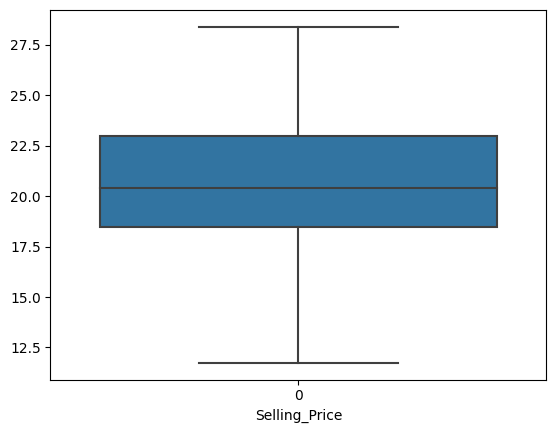

In [90]:
sns.boxplot(raw_data['mileage'])
plt.xlabel('Selling_Price')

In [88]:
# Calculating the first and third quartiles (Q1 and Q3) of the 'mileage' column
Q1 = raw_data['mileage'].quantile(0.25)
Q3 = raw_data['mileage'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating the upper and lower limits for outlier detection
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Displaying outliers that are above the upper limit
raw_data[raw_data['mileage'] > upper_limit]

# Displaying outliers that are below the lower limit
raw_data[raw_data['mileage'] < lower_limit]

# Filtering the DataFrame to exclude outliers in the 'mileage' column
# Here we should exclude both the outliers above the upper limit and below the lower limit
raw_data = raw_data[(raw_data['mileage'] < upper_limit) & (raw_data['mileage'] > lower_limit)]

# Displaying the shape of the DataFrame after removing outliers
raw_data.shape


(5490, 13)

Text(0.5, 0, 'Selling_Price')

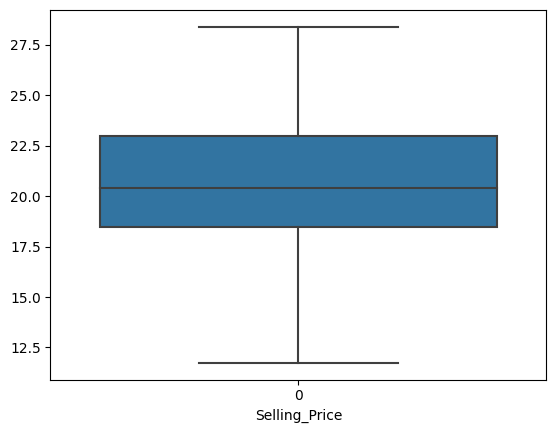

In [93]:
sns.boxplot(raw_data['mileage'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

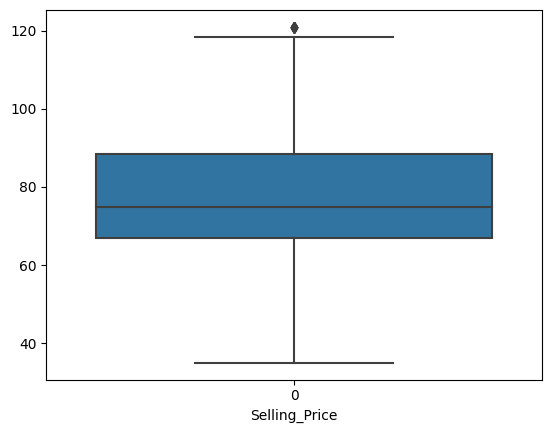

In [96]:
sns.boxplot(raw_data['max_power'])
plt.xlabel('Selling_Price')

In [95]:
# Calculating the first and third quartiles (Q1 and Q3) of the 'max_power' column
Q1 = raw_data['max_power'].quantile(0.25)
Q3 = raw_data['max_power'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating the upper and lower limits for outlier detection
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Displaying outliers that are above the upper limit
raw_data[raw_data['max_power'] > upper_limit]

# Displaying outliers that are below the lower limit
raw_data[raw_data['max_power'] < lower_limit]

# Filtering the DataFrame to exclude outliers in the 'max_power' column
# Exclude both the outliers above the upper limit and below the lower limit
raw_data = raw_data[(raw_data['max_power'] < upper_limit) & (raw_data['max_power'] > lower_limit)]

# Displaying the shape of the DataFrame after removing outliers
raw_data.shape


(5221, 13)

Text(0.5, 0, 'Selling_Price')

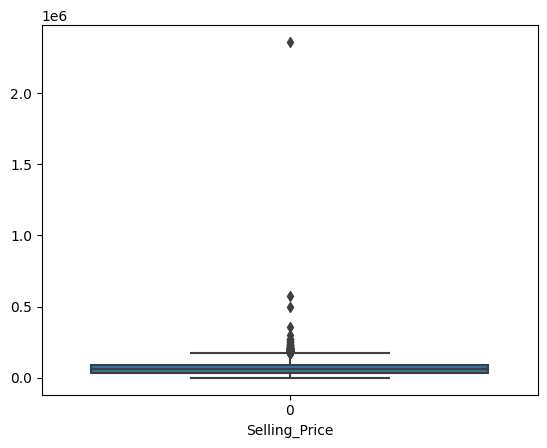

In [97]:
sns.boxplot(raw_data['km_driven'])
plt.xlabel('Selling_Price')

In [98]:
# Calculating the first and third quartiles (Q1 and Q3) of the 'km_driven' column
Q1 = raw_data['km_driven'].quantile(0.25)
Q3 = raw_data['km_driven'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating the upper and lower limits for outlier detection
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Displaying outliers that are above the upper limit
raw_data[raw_data['km_driven'] > upper_limit]

# Displaying outliers that are below the lower limit
raw_data[raw_data['km_driven'] < lower_limit]

# Filtering the DataFrame to exclude outliers in the 'km_driven' column
# Exclude both the outliers above the upper limit and below the lower limit
raw_data = raw_data[(raw_data['km_driven'] < upper_limit) & (raw_data['km_driven'] > lower_limit)]

# Displaying the shape of the DataFrame after removing outliers
raw_data.shape


(5105, 13)

Text(0.5, 0, 'Selling_Price')

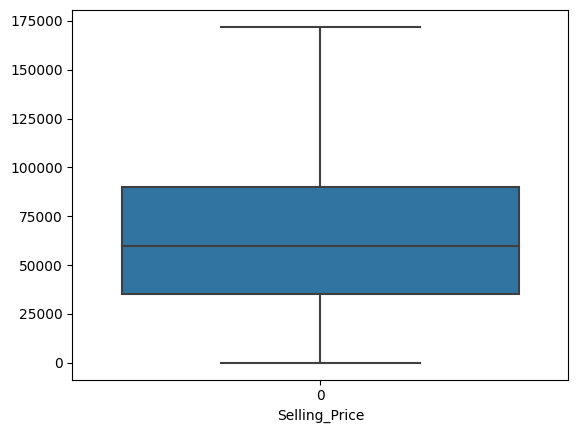

In [99]:
sns.boxplot(raw_data['km_driven'])
plt.xlabel('Selling_Price')

Text(0.5, 0, 'Selling_Price')

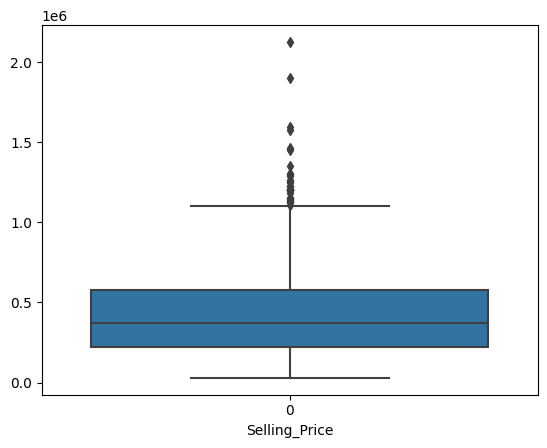

In [38]:
sns.boxplot(raw_data['selling_price'])
plt.xlabel('Selling_Price')

In [101]:
# Calculating the first and third quartiles (Q1 and Q3) of the 'selling_price' column
Q1 = raw_data['selling_price'].quantile(0.25)
Q3 = raw_data['selling_price'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating the upper and lower limits for outlier detection
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

# Displaying outliers that are above the upper limit
raw_data[raw_data['selling_price'] > upper_limit]

# Displaying outliers that are below the lower limit
raw_data[raw_data['selling_price'] < lower_limit]

# Filtering the DataFrame to exclude outliers in the 'selling_price' column
# Exclude both the outliers above the upper limit and below the lower limit
raw_data = raw_data[(raw_data['selling_price'] < upper_limit) & (raw_data['selling_price'] > lower_limit)]

# Displaying the shape of the DataFrame after removing outliers
raw_data.shape

# The following commented line is an alternative approach for removing outliers
# by keeping only the values between the 5th and 99th percentile:
# raw_data['selling_price'] = raw_data['selling_price'][raw_data['selling_price']\
#                                       .between(raw_data['selling_price'].quantile(.05), \
#                                                raw_data['selling_price'].quantile(.99))]


(5066, 13)

Text(0.5, 0, 'Selling_Price')

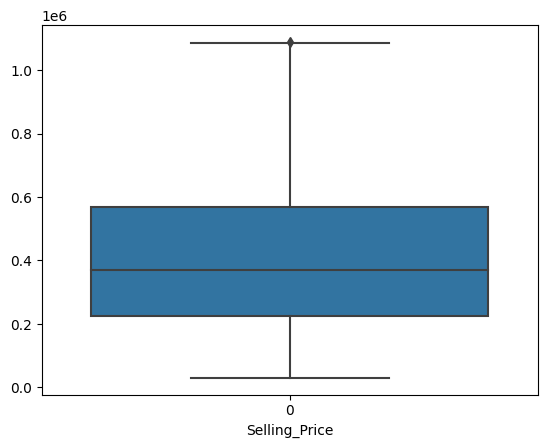

In [102]:
sns.boxplot(raw_data['selling_price'])
plt.xlabel('Selling_Price')

In [103]:
# Removing any rows with missing data in the DataFrame
raw_data.dropna(inplace=True, axis=0, how='any')

# Counting the number of duplicated rows in the DataFrame
duplicates_count = raw_data.duplicated().sum()

# Removing duplicate rows from the DataFrame
raw_data.drop_duplicates(inplace=True)

# Printing the count of duplicate rows that were found
print(f"Number of duplicate rows: {duplicates_count}")

# Calculating and printing the 1st percentile of the 'selling_price' column
print("1st percentile of selling_price:", raw_data['selling_price'].quantile(0.01))

# Calculating and printing the 99th percentile of the 'selling_price' column
print("99th percentile of selling_price:", raw_data['selling_price'].quantile(0.99))


Number of duplicate rows: 0
1st percentile of selling_price: 50000.0
99th percentile of selling_price: 960000.0


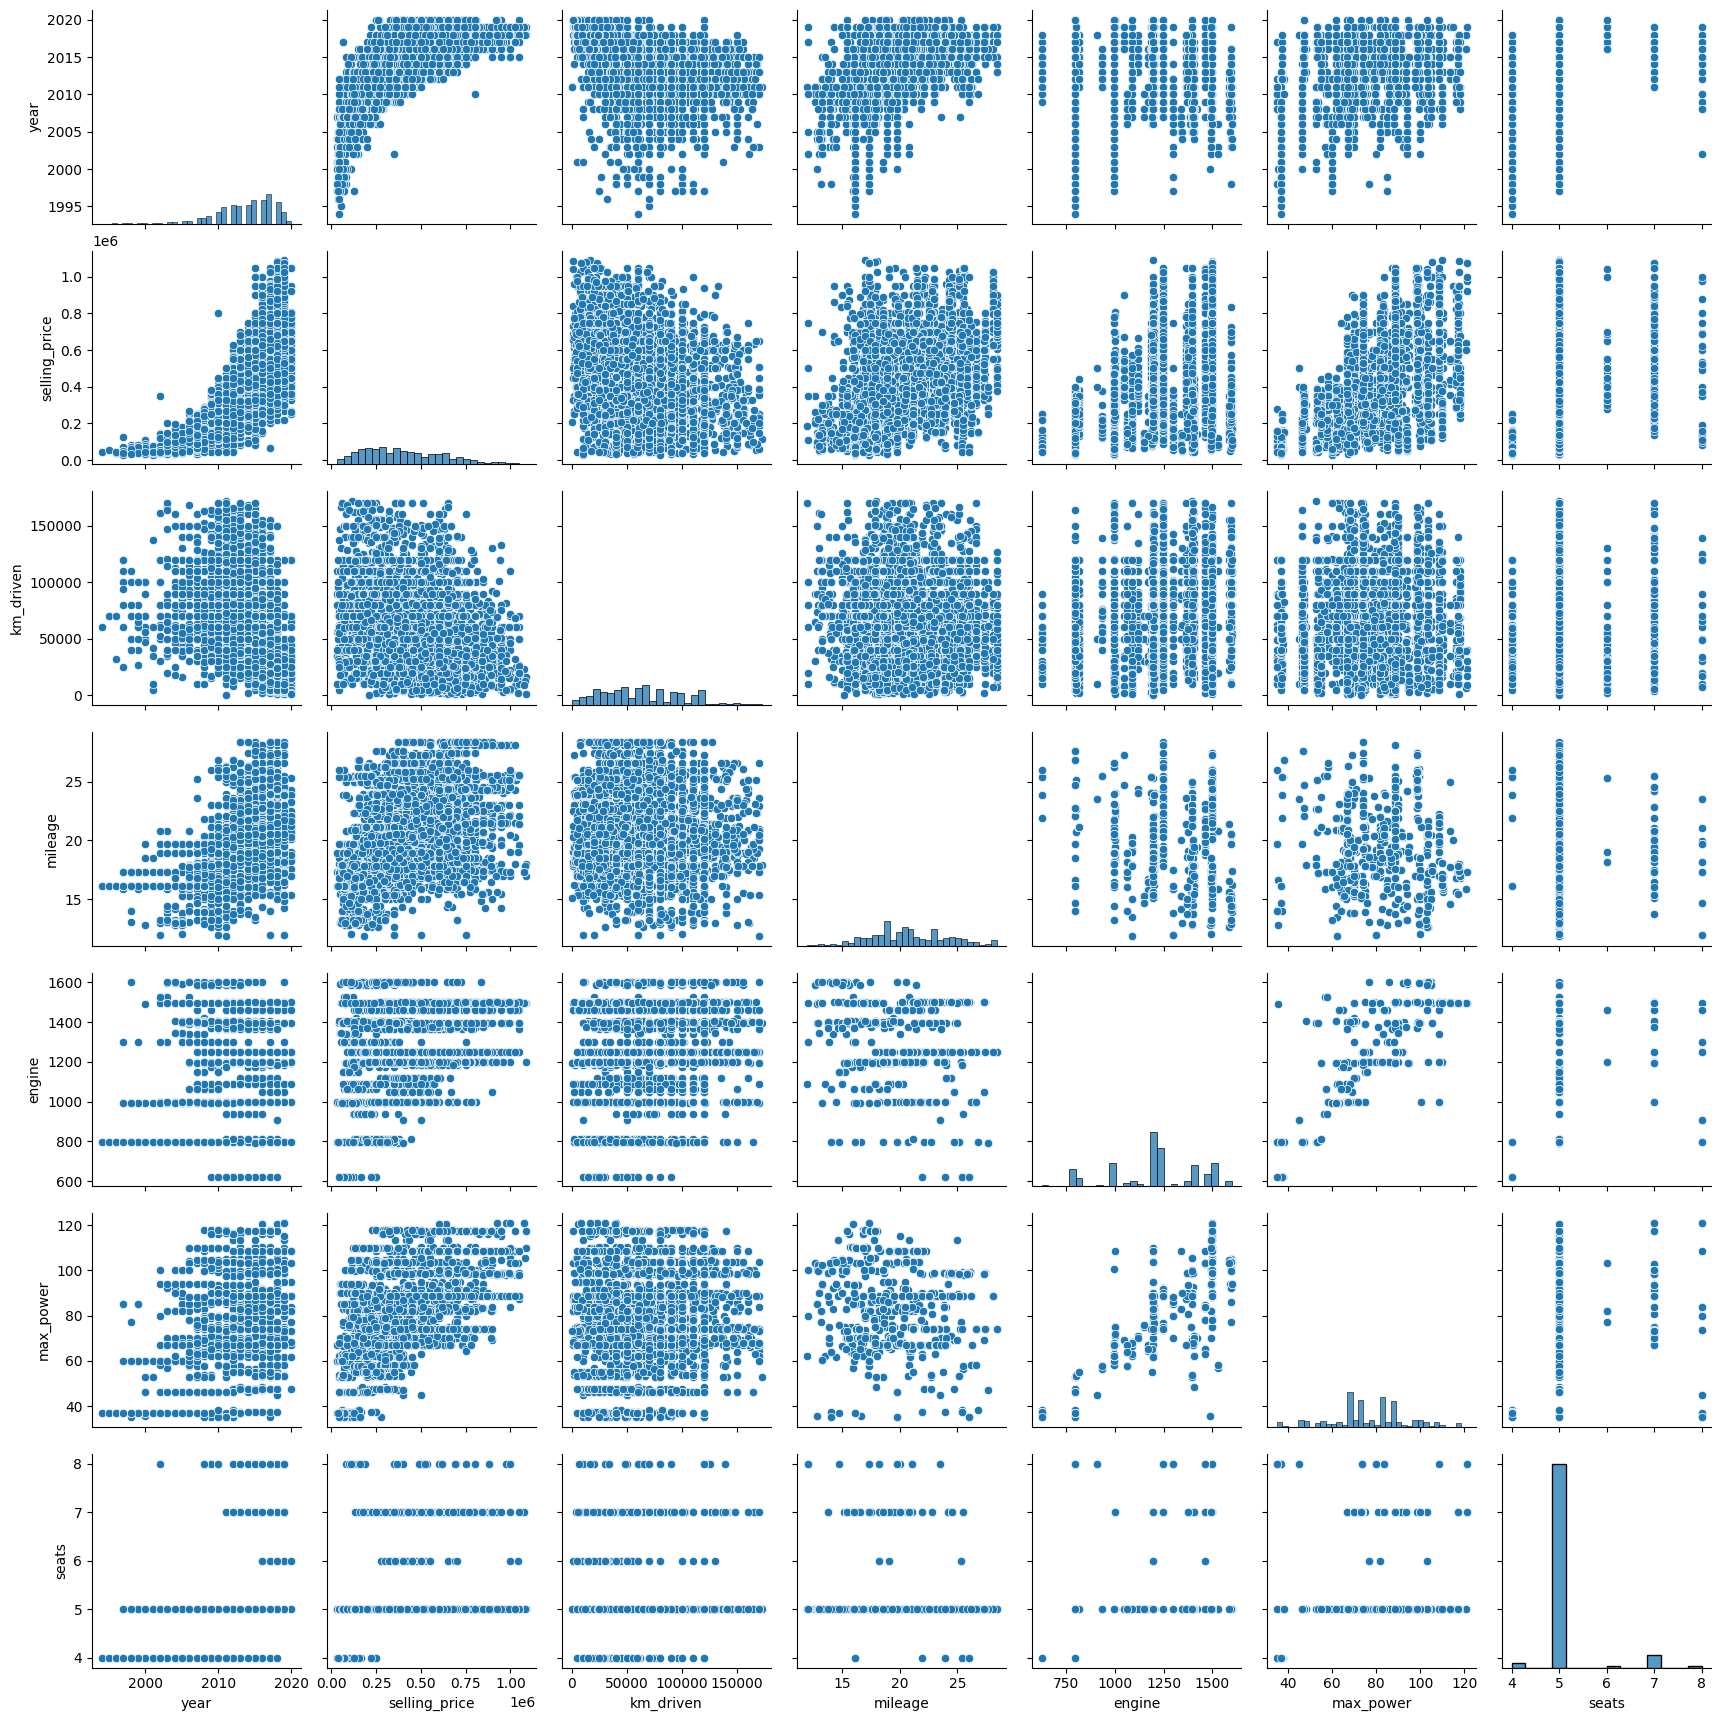

In [104]:
sns.pairplot(raw_data)

In [43]:
correlation = raw_data.corr()
correlation

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.727428,-0.468048,0.443671,0.092714,0.289751,0.173404
selling_price,0.727428,1.000000,-0.332019,0.350145,0.399273,0.581425,0.222495
km_driven,-0.468048,-0.332019,1.000000,-0.096008,0.236824,0.017760,0.023998
mileage,0.443671,0.350145,-0.096008,1.000000,-0.092882,-0.054663,-0.092900
engine,0.092714,0.399273,0.236824,-0.092882,1.000000,0.799610,0.206388
max_power,0.289751,0.581425,0.017760,-0.054663,0.799610,1.000000,0.170736
seats,0.173404,0.222495,0.023998,-0.092900,0.206388,0.170736,1.000000


Based on the provided correlation matrix, we can infer several relationships between the variables of the dataset:

Year and Selling Price: There is a moderate positive correlation (0.727428) between the year of the car and its selling_price, which suggests that newer cars tend to sell for higher prices.

Year and km_driven: There is a moderate negative correlation (-0.468048) between the year of the car and the km_driven, implying that newer cars generally have fewer kilometers driven.

Selling Price and max_power: There is a strong positive correlation (0.581425) between selling_price and max_power, indicating that cars with higher power typically sell for more.

Engine and max_power: There is a very strong positive correlation (0.796910) between engine size and max_power, which is expected since larger engines usually produce more power.

Mileage and km_driven: There is a small negative correlation (-0.096008) between mileage and km_driven, which might suggest that cars with higher mileage tend to have more kilometers on them, although the relationship is weak.

Seats: The number of seats in the car shows very weak correlations with all other variables, the strongest being with year (0.173404) and selling_price (0.222495), but these are still quite low.

From this data, we can conclude that certain attributes like the car's year, max_power, and engine size are more strongly associated with the selling_price. This could imply that these factors are important considerations for predicting the selling price of cars. On the other hand, variables like mileage and seats show weaker associations with selling_price.

It's important to note that correlation does not imply causation, and these relationships only indicate linear associations between the variables. There could be other factors at play that influence these relationships, and further analysis, possibly with regression modeling, would be needed to understand the causative factors.

In [105]:
raw_data.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8121                90Nm@ 3500rpm
8122        219.7Nm@ 1500-2750rpm
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
Name: torque, Length: 5066, dtype: object

In [45]:
X=raw_data.drop(columns=['torque','selling_price','name'],axis=1)
y=raw_data['selling_price']

dropping 'torque' and 'name' can be justified if they don't contribute to the predictive power of the model or are too complex to handle. 'Selling_price' must be dropped from the features since it is the target variable. However, any decision to drop features should ideally be backed by exploratory data analysis, domain knowledge, and possibly feature importance analysis post-model training.

In [46]:
#X['mileage']=X['mileage'].replace(' kmpl',' ',regex=True)
#X['mileage']=X['mileage'].replace(' km/kg',' ',regex=True)
#X['engine']=X['engine'].replace(' CC',' ',regex=True)
#X['max_power']=X['max_power'].replace(' bhp',' ',regex=True)

In [47]:
#X['mileage'] = pd.to_numeric(X['mileage'])
#X['engine'] = pd.to_numeric(X['engine'])
#X['max_power'] = pd.to_numeric(X['max_power'])

In [48]:
#raw_data['selling_price'].unique()

In [49]:
X=pd.get_dummies(X,columns=['fuel','seller_type','transmission','owner'],\
                 prefix=['fuel','seller_type','transmission','owner'],drop_first=True)


In [107]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X = scalar.fit_transform(X)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle=False,)


print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (4092, 15)
X_test shape (1024, 15)
y_train shape (4092,)
y_test shape (1024,)


In [52]:
from xgboost import XGBRegressor
regressor = XGBRegressor(
    gamma=0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1
)

model = regressor.fit(X_train, y_train)


In [53]:
trainPredict = model.predict(X_train)

testPredict = model.predict(X_test)

In [108]:
import sklearn.metrics as metrics  # Metrics module for evaluation (if needed for additional metrics)
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor with a random state for reproducibility
regressor = RandomForestRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Print the R^2 score on the training set
print("Training set R^2 score:", regressor.score(X_train, y_train))

# Print the R^2 score on the test set
print("Test set R^2 score:", regressor.score(X_test, y_test))


Training set R^2 score: 0.9828306382474902
Test set R^2 score: 0.87254144208065


R-Squared: 0.87254144208065
MAE: 57096.58707918788
MSE: 6429499245.065012
RMSE: 80184.15831736973


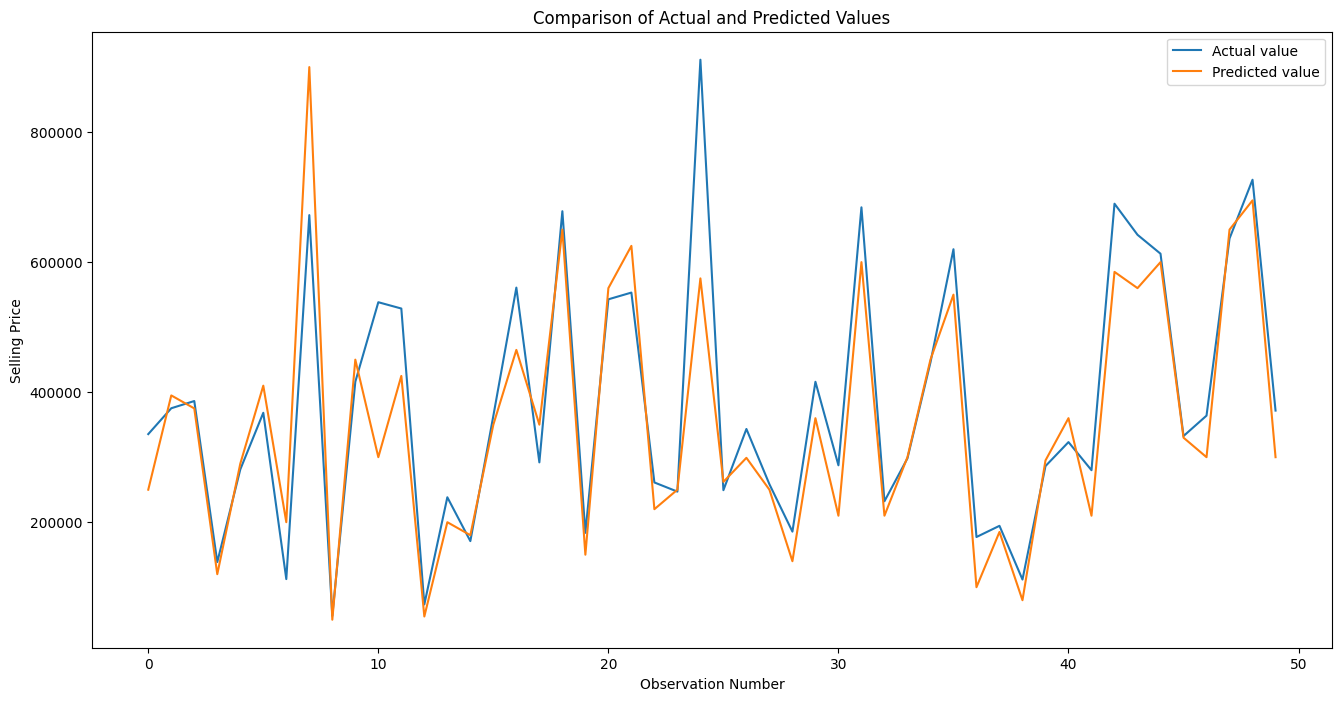

In [109]:
# Predictions
y_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

# Importing mean_absolute_error
from sklearn.metrics import mean_absolute_error

# Printing various performance metrics
print('R-Squared:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  # Using np.sqrt instead of math.sqrt

# Creating a DataFrame to hold the predicted and actual values for easy plotting
test = pd.DataFrame({'Predicted value': y_pred, 'Actual value': y_test})

# Resetting the index of the test DataFrame for plotting
test = test.reset_index(drop=True)

# Plotting the first 50 actual and predicted values
fig = plt.figure(figsize=(16, 8))
plt.plot(test[:50])
plt.title('Comparison of Actual and Predicted Values')  # Adding a title
plt.xlabel('Observation Number')  # Adding x-label
plt.ylabel('Selling Price')  # Adding y-label
plt.legend(['Actual value', 'Predicted value'])  # Adding legend
plt.show()  # Displaying the plot


Training set R-squared score: 0.9961997753240429
Test set R-squared score: 0.8009494817543332
R-Squared: 0.8009494817543332
RMSE: 100204.15518946007


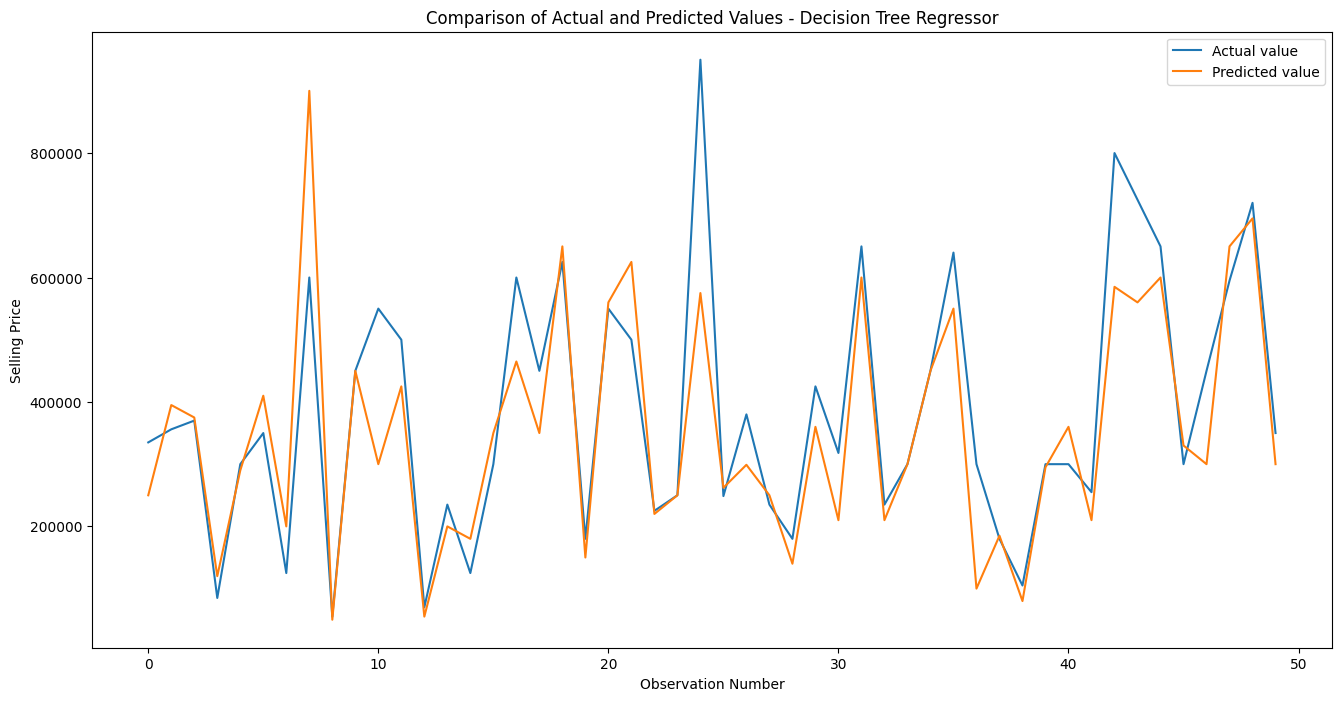

In [111]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor with a random state for reproducibility
DTR = DecisionTreeRegressor(random_state=0)

# Fit the DecisionTreeRegressor to the training data
DTR.fit(X_train, y_train)

# Print the R-squared score on the training set
print("Training set R-squared score:", DTR.score(X_train, y_train))

# Print the R-squared score on the test set
print("Test set R-squared score:", DTR.score(X_test, y_test))

# Predict on the test and train sets
y_pred_DTR = DTR.predict(X_test)
train_pred_DTR = DTR.predict(X_train)

# Calculate and print the R-squared and RMSE on the test set
print('R-Squared:', metrics.r2_score(y_test, y_pred_DTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DTR)))

# Create a DataFrame to hold predicted and actual values for plotting
test = pd.DataFrame({'Predicted value': y_pred_DTR, 'Actual value': y_test})

# Create a plot of the first 50 actual and predicted values
fig = plt.figure(figsize=(16,8))
test = test.reset_index(drop=True)
plt.plot(test[:50])
plt.title('Comparison of Actual and Predicted Values - Decision Tree Regressor')
plt.xlabel('Observation Number')
plt.ylabel('Selling Price')
plt.legend(['Actual value', 'Predicted value'])
plt.show()  # Display the plot


In [117]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
# ... rest of your regression code

print(xgb.score(X_train, y_train))

0.9717052760131439


R-Squared: 0.8818430311323029
RMSE: 77202.92329167412


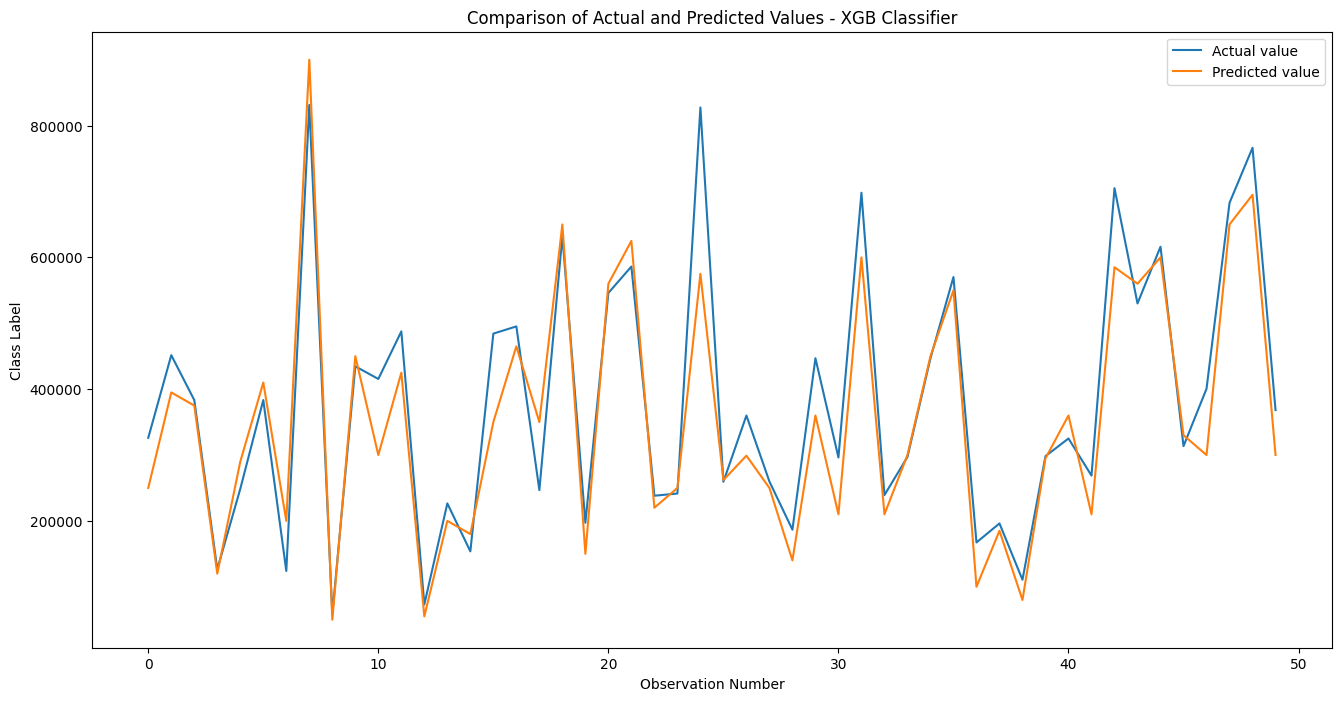

In [118]:
# Predict on the test and train sets
y_pred_xgb = xgb.predict(X_test)
train_pred_xgb = xgb.predict(X_train)

# Calculate and print the R-squared and RMSE on the test set
# NOTE: For classification tasks, R-squared is not typically used. It's more common to look at accuracy,
# precision, recall, F1 score, or AUC-ROC. RMSE is also not used for classification.
# These metrics are calculated assuming a regression task, which might not be appropriate for XGBClassifier.
print('R-Squared:', metrics.r2_score(y_test, y_pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

# Create a DataFrame to hold predicted and actual values for plotting
test = pd.DataFrame({'Predicted value': y_pred_xgb, 'Actual value': y_test})

# Create a plot of the first 50 actual and predicted values
fig = plt.figure(figsize=(16,8))
test = test.reset_index(drop=True)
plt.plot(test[:50])
plt.title('Comparison of Actual and Predicted Values - XGB Classifier')
plt.xlabel('Observation Number')
plt.ylabel('Class Label')
plt.legend(['Actual value', 'Predicted value'])
plt.show()  # Display the plot


0.8928018806471371
R-Squared: 0.8682233382401282
RMSE: 81531.1044273034


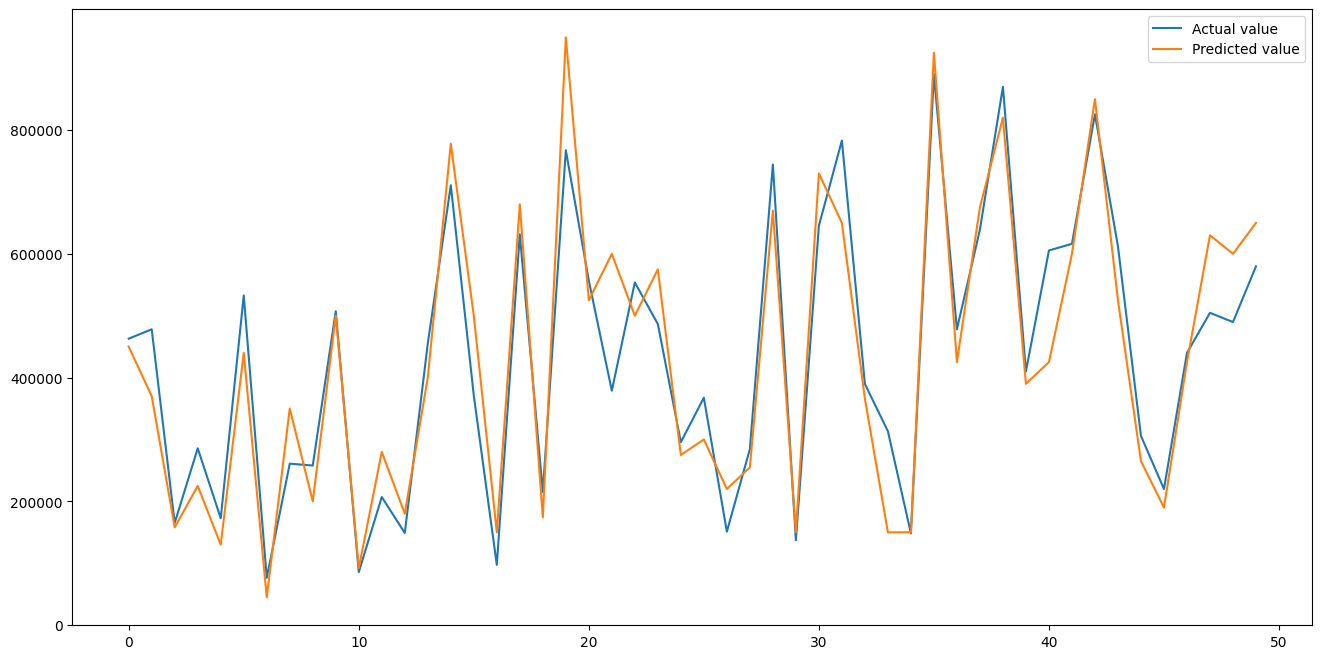

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)
reg_pred=reg.predict(X_test)
print(reg.score(X_train, y_train))


y_pred_reg = reg.predict(X_test)
train_pred_reg=reg.predict(X_train)

print('R-Squared:',metrics.r2_score(y_test,y_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))

test = pd.DataFrame({'Predicted value':train_pred_reg, 'Actual value':y_train})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

A higher R-squared and a lower RMSE generally indicate a better model. However, it's also important to consider overfitting; if a model has a much higher R-squared score on the training set than on the test set, it may be overfitting.

In [120]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error


# Calculating R-squared and RMSE for Decision Tree Regressor
r2_dtr = r2_score(y_test, y_pred_DTR)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_DTR))

# Calculating R-squared and RMSE for XGBoost Regressor
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculating R-squared and RMSE for Gradient Boosting Regressor
r2_gb = r2_score(y_test, y_pred_reg)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_reg))

# Creating a DataFrame to summarize the results
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree Regressor', 'XGBoost Regressor', 'Gradient Boosting Regressor'],
    'R-Squared': [r2_dtr, r2_xgb, r2_gb],
    'RMSE': [rmse_dtr, rmse_xgb, rmse_gb]
})

print(model_comparison)


                         Model  R-Squared           RMSE
0      Decision Tree Regressor   0.800949  100204.155189
1            XGBoost Regressor   0.881843   77202.923292
2  Gradient Boosting Regressor   0.868223   81531.104427


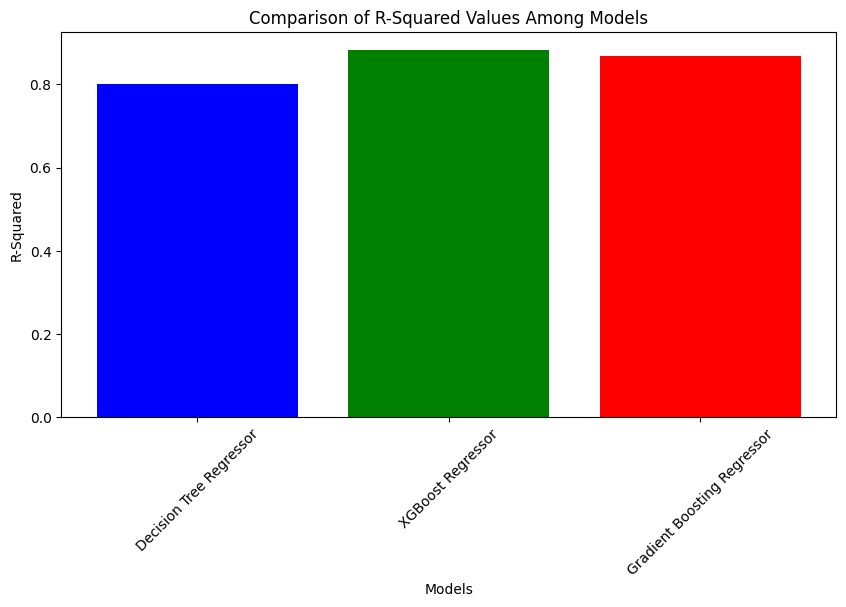

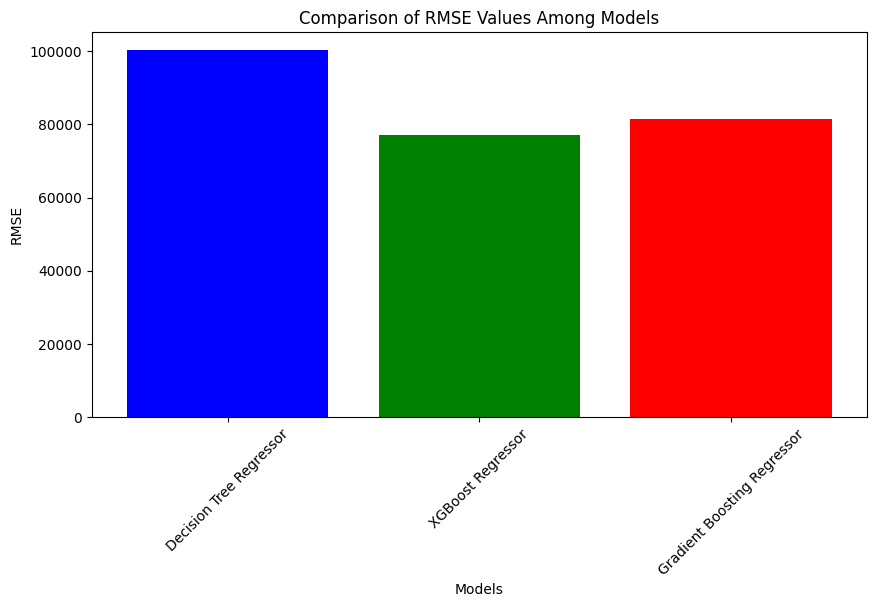

In [123]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

r2_dtr = r2_score(y_test, y_pred_DTR)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_DTR))

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))


r2_gb = r2_score(y_test, y_pred_reg)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_reg))

model_comparison = pd.DataFrame({
    'Model': ['Decision Tree Regressor', 'XGBoost Regressor', 'Gradient Boosting Regressor'],
    'R-Squared': [r2_dtr, r2_xgb, r2_gb],
    'RMSE': [rmse_dtr, rmse_xgb, rmse_gb]
})

#print(model_comparison)


plt.figure(figsize=(10, 5))
plt.bar(model_comparison['Model'], model_comparison['R-Squared'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-Squared')
plt.title('Comparison of R-Squared Values Among Models')
plt.xticks(rotation=45)
plt.show()

# Plotting the RMSE values
plt.figure(figsize=(10, 5))
plt.bar(model_comparison['Model'], model_comparison['RMSE'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Values Among Models')
plt.xticks(rotation=45)
plt.show()
